In [50]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt

In [51]:
%tf_version 2.x

UsageError: Line magic function `%tf_version` not found.


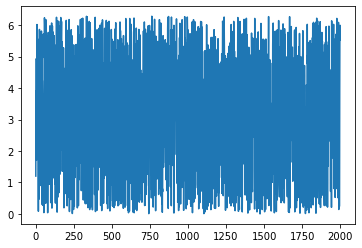

In [57]:
# Generate some random samples
nsamples= 2000
np.random.seed(1234)
x_values = np.random.uniform(low=0, high=(2 * math.pi), size=nsamples)
plt.plot(x_values)

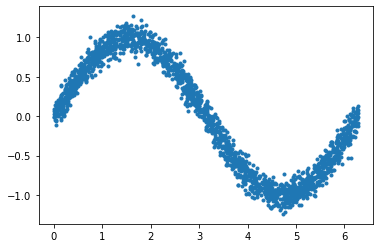

In [58]:
# Create a noisy sinewave with these values
y_values = np.sin(x_values) + (0.1 * np.random.randn(x_values.shape[0]))
plt.plot(x_values, y_values, '.')

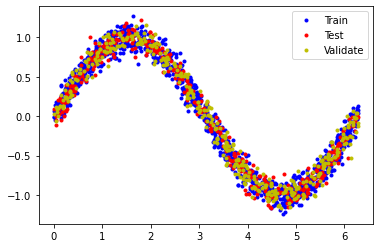

In [59]:
# Split the dataset into training, validation, and test sets
val_ratio = 0.2
test_ratio = 0.2

val_split = int(val_ratio * nsamples)
test_split = int(val_split  + (test_ratio * nsamples))
x_val, x_test, x_train = np.split(x_values, [val_split, test_split])
y_val, y_test, y_train = np.split(y_values, [val_split, test_split])

# Check that our splits add up correctly
assert(x_train.size  + x_val.size  + x_test.size) == nsamples

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_val, y_val, 'y.', label="Validate")
plt.legend()
plt.show()

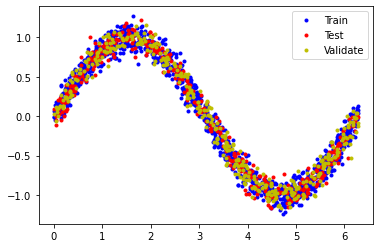

In [72]:
# Split the dataset into training, validation, and test sets
val_split = int(val_ratio * nsamples)
test_split = int(val_split  + (test_ratio * nsamples))
x_val, x_test, x_train = np.split(x_values, [val_split, test_split])
y_val, y_test, y_train = np.split(y_values, [val_split, test_split])

# Check that our splits add up correctly
assert(x_train.size  + x_val.size +  x_test.size) == nsamples

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_val, y_val, 'y.', label="Validate")
plt.legend()
plt.show()

In [73]:
# Create a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [74]:
# Add optimizer, loss function, and metrics to model and compile it
model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])

In [75]:
# Train model
history = model.fit(x_train,
                    y_train,
                    epochs=500,
                    batch_size=100,
                    validation_data=(x_val, y_val),
                    verbose=0)

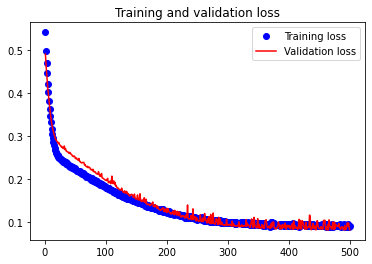

In [76]:
# Plot the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) +  1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

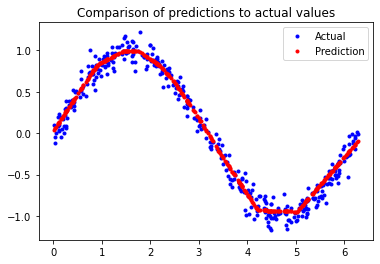

In [78]:
#Plot predictions against actual values
predictions = model.predict(x_test)

plt.clf()
plt.title("Comparison of predictions to actual values")
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Prediction')
plt.legend()
plt.show()

In [79]:
#Test a few numbers
model.predict(np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]))

array([[ 0.03260753],
       [ 0.85879433],
       [ 0.8950908 ],
       [ 0.17349225],
       [-0.73994124],
       [-0.9470948 ],
       [-0.28548795]], dtype=float32)

In [97]:
#Save Keras model
model_file_name = 'sine_model'
model.save(model_file_name + '.h5')

In [98]:
# Convert Keras model to a tflite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open(model_file_name  + '.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpa22mins_/assets


INFO:tensorflow:Assets written to: /tmp/tmpa22mins_/assets
2021-12-08 11:16:07.094949: I tensorflow/core/grappler/devices.cc:69] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2021-12-08 11:16:07.095087: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2021-12-08 11:16:07.095831: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: Quadro RTX 4000 computeCapability: 7.5
coreClock: 1.545GHz coreCount: 36 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 387.49GiB/s
2021-12-08 11:16:07.095871: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-12-08 11:16:07.095913: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2021-12-08 11:16:07.095943: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic 

3008

In [99]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str  = '#ifndef '  + var_name.upper() +  '_H\n'
  c_str  = '#define '  + var_name.upper() +  '_H\n\n'

  # Add array length at top of file
  c_str  = '\nunsigned int ' +  var_name +  '_len = ' +  str(len(hex_data)) +  ';\n'

  # Declare C variable
  c_str  = 'unsigned char ' +  var_name  + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i +  1) < len(hex_data):
      hex_str += ','
    if (i +  1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str  = '\n ' +  format(' '.join(hex_array))  + '\n};\n\n'

  # Close out header guard
  c_str  = '#endif //' +  var_name.upper() +  '_H'

  return c_str

In [100]:
# Write TFLite model to a C source (or header) file
c_model_name = 'sine_model'
with open(c_model_name  + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))

IsADirectoryError: [Errno 21] Is a directory: 'sine_model.h'